In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Interactive plots
# !pip install plotly
import plotly.express as px

# Notebook settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Load the dataset (after uploading via Colab's file upload)
df = pd.read_csv("studentMat.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


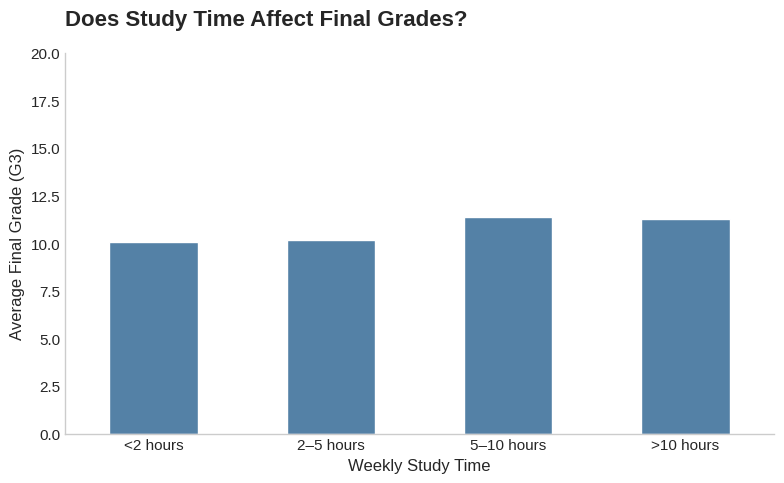

In [ ]:
studytime_avg = df.groupby("studytime")["G3"].mean().reset_index()

# Map studytime codes to readable labels
studytime_labels = {
    1: "<2 hours",
    2: "2–5 hours",
    3: "5–10 hours",
    4: ">10 hours"
}
studytime_avg["label"] = studytime_avg["studytime"].map(studytime_labels)

plt.figure(figsize=(8, 5))

sns.barplot(data=studytime_avg, x="label", y="G3", color='#4682B4', width=0.5)

plt.title("Does Study Time Affect Final Grades?", fontsize=16, loc='left', pad=20, fontweight='bold')
plt.xlabel("Weekly Study Time", fontsize=12)
plt.ylabel("Average Final Grade (G3)", fontsize=12)

# Clean formatting
sns.despine(top=True, right=True)
plt.ylim(0, 20)
plt.grid(False)
plt.tight_layout()
plt.show()


<ipython-input-44-db043c8a8a15>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


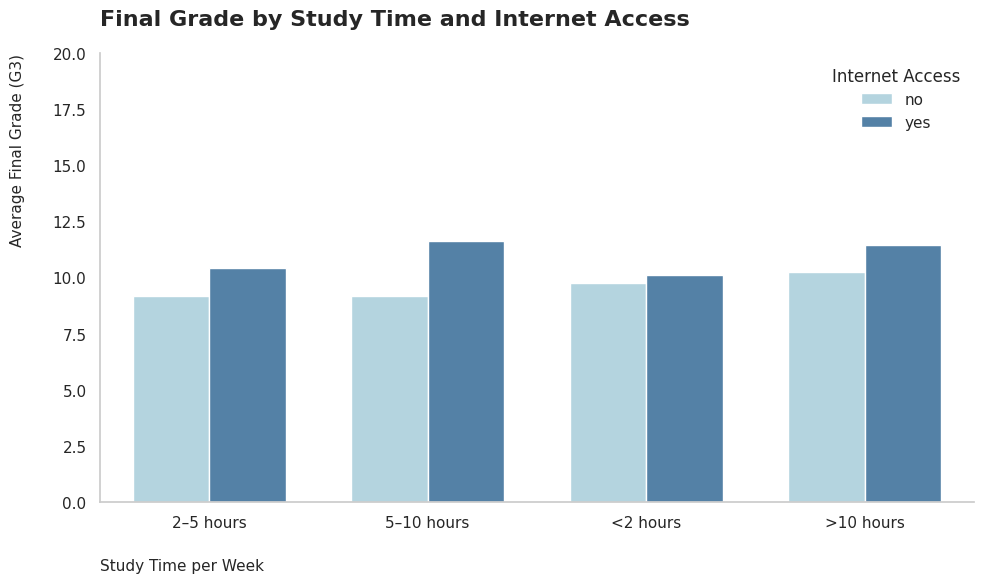

In [ ]:

# Map study time to readable labels
studytime_labels = {
    1: "<2 hours",
    2: "2–5 hours",
    3: "5–10 hours",
    4: ">10 hours"
}
df["StudyTimeLabel"] = df["studytime"].map(studytime_labels)

# Set custom colors
custom_palette = {"yes": "steelblue", "no": "lightblue"}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="StudyTimeLabel",
    y="G3",
    hue="internet",
    palette=custom_palette,
    ci=None,
    dodge=True,
    width=0.7
)

# Customize
plt.title("Final Grade by Study Time and Internet Access", fontsize=16, loc="left", pad=20,fontweight='bold')

plt.xlabel("Study Time per Week", fontsize=11, labelpad=20, loc="left")

plt.ylabel("Average Final Grade (G3)", fontsize=11, labelpad=20, loc="top",rotation=90)

plt.legend(title="Internet Access")
plt.ylim(0, 20)

# Remove gridlines and right/top borders
plt.grid(False)  # Disable gridlines
sns.despine(top=True, right=True)  # Remove top and right borders

plt.tight_layout()
plt.show()

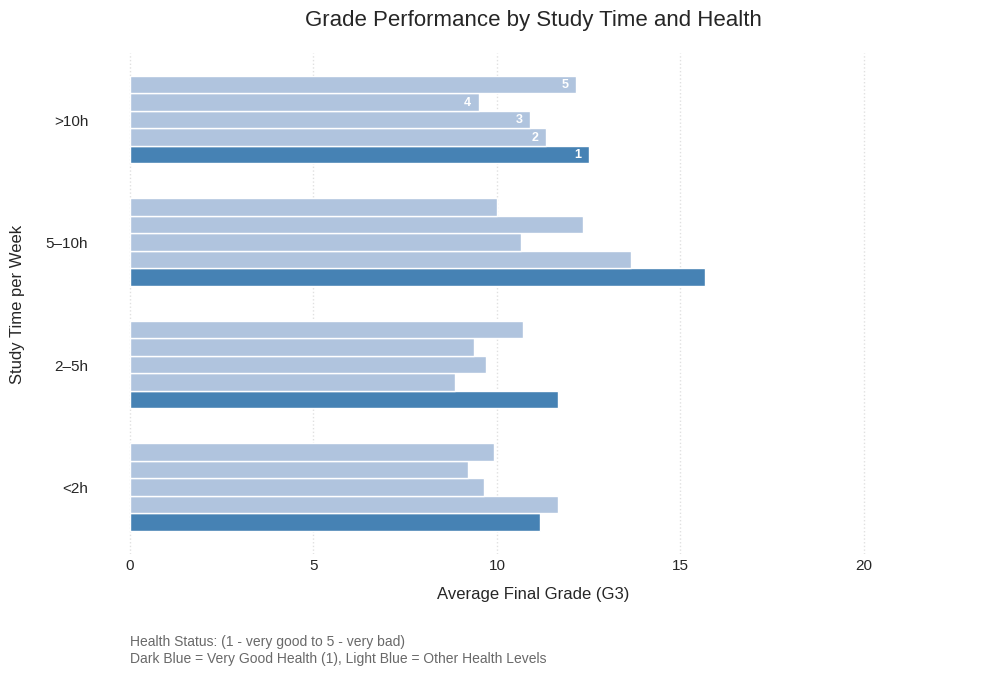

In [ ]:
agg_df = df.groupby(['studytime', 'health'])['G3'].mean().reset_index()
agg_df.rename(columns={'G3': 'avg_G3'}, inplace=True)

plt.style.use('seaborn-v0_8-whitegrid')

studytime_labels = {
    1: "<2h",
    2: "2–5h",
    3: "5–10h",
    4: ">10h"
}

# Uvalues and layout settings
health_statuses_unique = sorted(df['health'].unique())
studytime_order = sorted(df['studytime'].unique())
bar_height = 0.15
group_padding = 0.3
num_health_statuses = len(health_statuses_unique)
y_group_centers = np.arange(len(studytime_order)) * (num_health_statuses * bar_height + group_padding)

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

for i, st_time in enumerate(studytime_order):
    study_data = agg_df[agg_df['studytime'] == st_time].sort_values(by='health')
    base_y = y_group_centers[i] - (num_health_statuses - 1) * bar_height / 2

    for j, health_val in enumerate(health_statuses_unique):
        row = study_data[study_data['health'] == health_val]
        if not row.empty:
            avg_grade = row['avg_G3'].iloc[0]
            bar_y = base_y + j * bar_height

            color = '#4682B4' if health_val == 1 else '#B0C4DE'

            ax.barh(bar_y, avg_grade, height=bar_height, color=color)

            if i == 3:
                ax.text(avg_grade - 0.2, bar_y, f"{health_val}",
                        va='center', ha='right', fontsize=9, color='white', fontweight='bold')

ax.set_yticks(y_group_centers)
ax.set_yticklabels([studytime_labels[st] for st in studytime_order], fontsize=11)
ax.set_ylabel("Study Time per Week", fontsize=12, labelpad=15)

ax.set_xlabel("Average Final Grade (G3)", fontsize=12, labelpad=10)
ax.set_title("Grade Performance by Study Time and Health", fontsize=16, pad=20)
ax.set_xlim(-1, df['G3'].max() + 3)

ax.text(
    x=0, y=-1.5,
    s="Health Status: (1 - very good to 5 - very bad)\nDark Blue = Very Good Health (1), Light Blue = Other Health Levels",
    fontsize=10, color='dimgray', ha='left'
)

ax.grid(axis='x', linestyle=':', alpha=0.6)
ax.grid(axis='y', alpha=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

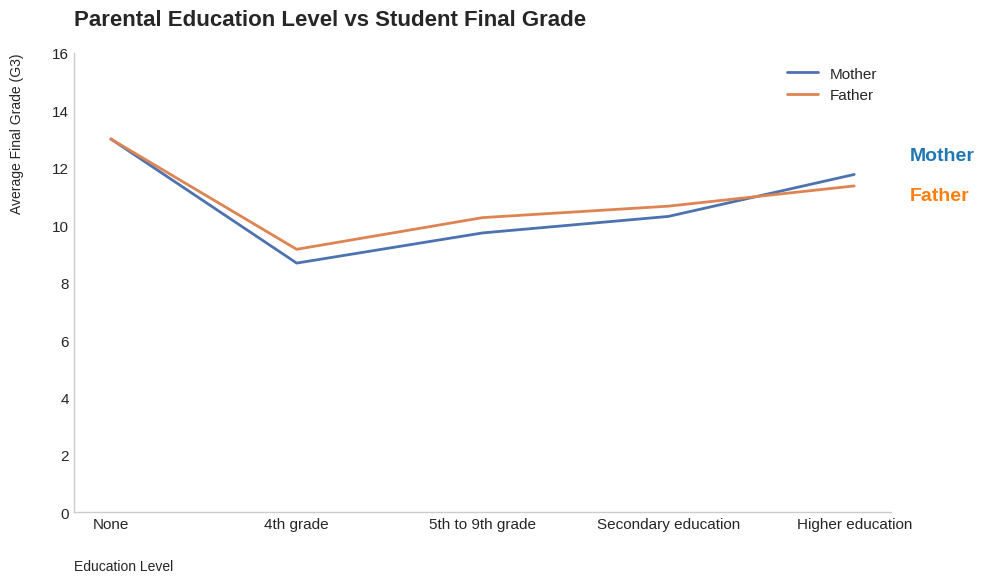

In [ ]:
mother_edu = df.groupby("Medu")["G3"].mean().reset_index()
father_edu = df.groupby("Fedu")["G3"].mean().reset_index()

mother_edu.columns = ["EduLevel", "Mother"]
father_edu.columns = ["EduLevel", "Father"]

# Merge datasets
parent_line = pd.merge(mother_edu, father_edu, on="EduLevel")

edu_labels = {
    0: "None",
    1: "4th grade",
    2: "5th to 9th grade",
    3: "Secondary education",
    4: "Higher education"
}

plt.figure(figsize=(10, 6))

sns.lineplot(x="EduLevel", y="Mother", data=parent_line, label="Mother", linewidth=2)
sns.lineplot(x="EduLevel", y="Father", data=parent_line, label="Father", linewidth=2)

# Label end points with spacing and larger text
last_x = parent_line["EduLevel"].max()
mother_last_y = parent_line["Mother"].iloc[-1]
father_last_y = parent_line["Father"].iloc[-1]

plt.text(last_x + 0.3, mother_last_y + 0.5, "Mother", color="tab:blue", fontsize=14, weight='bold')
plt.text(last_x + 0.3, father_last_y - 0.5, "Father", color="tab:orange", fontsize=14, weight='bold')


plt.title("Parental Education Level vs Student Final Grade", fontsize=16, loc='left', pad=20,fontweight='bold')
plt.xlabel("Education Level", fontsize=10, labelpad=20, loc="left")

plt.ylabel("Average Final Grade (G3)", fontsize=10, labelpad=20, loc="top",rotation=90)

plt.xticks([0, 1, 2, 3, 4], [edu_labels[i] for i in [0, 1, 2, 3, 4]])

plt.ylim(0, 16)
ax.spines['left'].set_visible(True)
sns.despine(top=True, left=False)

plt.grid(False)
plt.tight_layout()
plt.show()

<ipython-input-20-e72cf926bf50>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


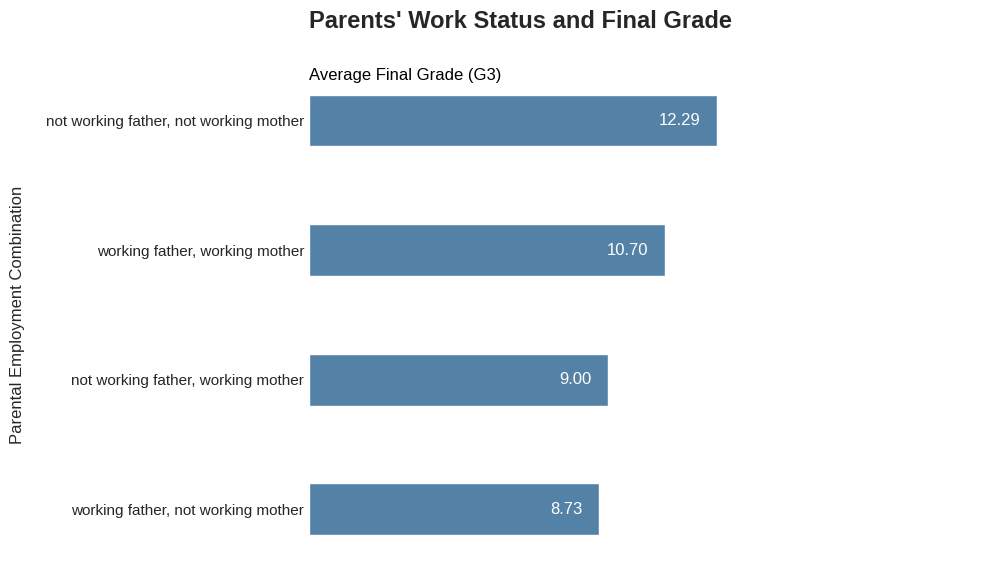

In [ ]:
# Categorize job types as 'working' or 'not working'
df["MotherStatus"] = df["Mjob"].apply(lambda x: "not working" if x == "at_home" else "working")
df["FatherStatus"] = df["Fjob"].apply(lambda x: "not working" if x == "at_home" else "working")

# Combine statuses
df["ParentWorkCombo"] = df["FatherStatus"] + " father, " + df["MotherStatus"] + " mother"

# Group and sort by average grade
combo_avg = df.groupby("ParentWorkCombo")["G3"].mean().reset_index()
combo_avg = combo_avg.sort_values("G3", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combo_avg,
    y="ParentWorkCombo",
    x="G3",
    color="#4682B4",
    ci=None,
    width=0.4
)


# Label values inside the bar
for index, value in enumerate(combo_avg["G3"]):
    plt.text(
        value - 0.5,
        index,
        f'{value:.2f}',
        va='center',
        ha='right',
        fontsize=12,
        color='white'
    )

plt.gca().axes.get_xaxis().set_visible(False)

plt.title("Parents' Work Status and Final Grade", fontsize=17, loc="left", pad=20, fontweight='bold')
plt.ylabel("Parental Employment Combination", fontsize=12, labelpad=15)

plt.xlim(0, 20)
plt.grid(False)

plt.text(
    0,
    max(combo_avg.index) - 3.35,
    "Average Final Grade (G3)",
    va='center',
    ha='left',
    fontsize=12,
    color='black'
)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()
plt.show()


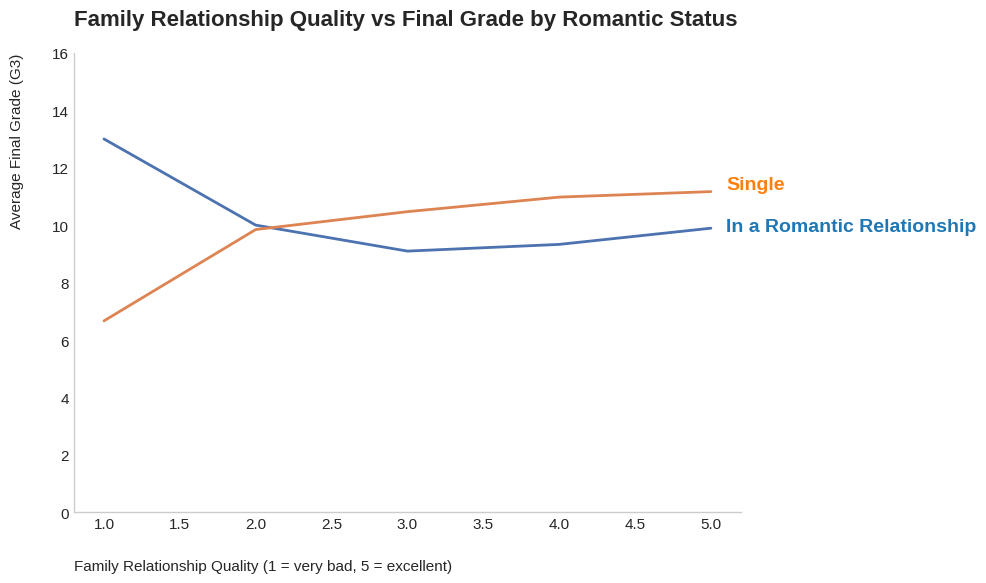

In [ ]:

# Group data by family relationship quality and romantic status
romantic_yes = df[df['romantic'] == 'yes'].groupby("famrel")["G3"].mean().reset_index()
romantic_no = df[df['romantic'] == 'no'].groupby("famrel")["G3"].mean().reset_index()

romantic_yes.columns = ["FamRel", "Romantic_Yes"]
romantic_no.columns = ["FamRel", "Romantic_No"]

# Merge the two for a single plot
relationship_line = pd.merge(romantic_yes, romantic_no, on="FamRel")

# Plot
plt.figure(figsize=(10, 6))

# Line plots
sns.lineplot(x="FamRel", y="Romantic_Yes", data=relationship_line, label="In Relationship", linewidth=2)
sns.lineplot(x="FamRel", y="Romantic_No", data=relationship_line, label="Not in Relationship", linewidth=2)

# Label end points
last_x = relationship_line["FamRel"].max()
yes_last_y = relationship_line["Romantic_Yes"].iloc[-1]
no_last_y = relationship_line["Romantic_No"].iloc[-1]

plt.text(last_x + 0.1, yes_last_y - 0.1, "In a Romantic Relationship", color="tab:blue", fontsize=14, weight='bold')
plt.text(last_x + 0.1, no_last_y + 0.1, "Single", color="tab:orange", fontsize=14, weight='bold')

# Labels and title
plt.title("Family Relationship Quality vs Final Grade by Romantic Status", fontsize=16, loc='left', pad=20, fontweight='bold')
plt.xlabel("Family Relationship Quality (1 = very bad, 5 = excellent)", fontsize=11, labelpad=20, loc="left")
plt.ylabel("Average Final Grade (G3)", fontsize=11, labelpad=20, loc="top", rotation=90)

# Y-axis range and style
plt.ylim(0, 16)
sns.despine(top=True, left=False)
plt.grid(False)

# Hide legend (already labeled manually)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

<ipython-input-50-df3d0e3ba6a7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Support Type', y='G3',


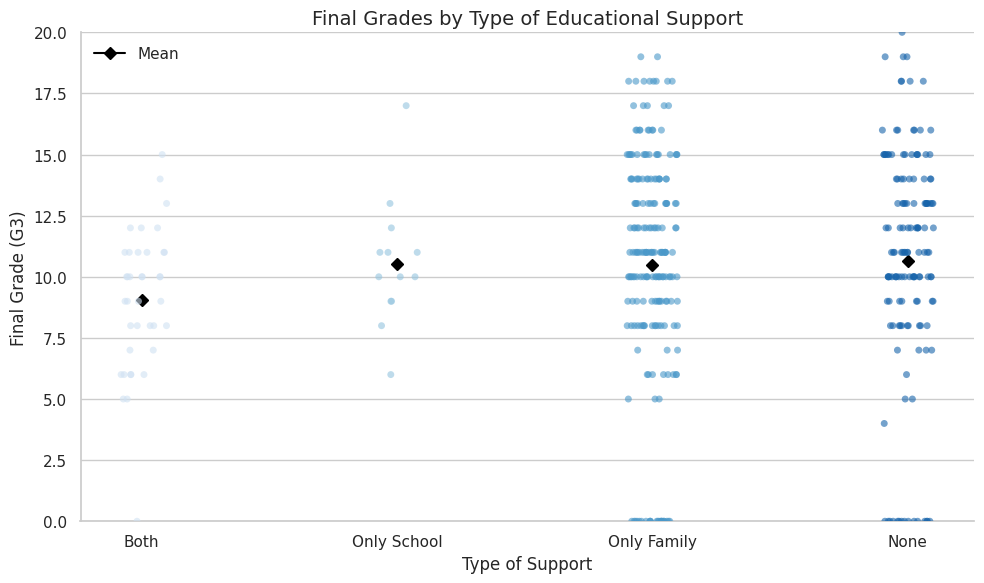

In [ ]:
# Re-define the support type column if needed
def support_type(row):
    if row['schoolsup'] == 'yes' and row['famsup'] == 'yes':
        return 'Both'
    elif row['schoolsup'] == 'yes':
        return 'Only School'
    elif row['famsup'] == 'yes':
        return 'Only Family'
    else:
        return 'None'

df['Support Type'] = df.apply(support_type, axis=1)

# Plot strip + swarm (optional: combine for better density)
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Support Type', y='G3',
              order=['Both', 'Only School', 'Only Family', 'None'],
              palette='Blues', jitter=True, alpha=0.6)

# Add mean markers
means = df.groupby('Support Type')['G3'].mean().reindex(['Both', 'Only School', 'Only Family', 'None'])
for i, mean in enumerate(means):
    plt.plot(i, mean, marker='D', color='black', markersize=6, label='Mean' if i == 0 else "")

# Titles and formatting
plt.title("Final Grades by Type of Educational Support", fontsize=14)
plt.xlabel("Type of Support")
plt.ylabel("Final Grade (G3)")
plt.ylim(0, 20)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()


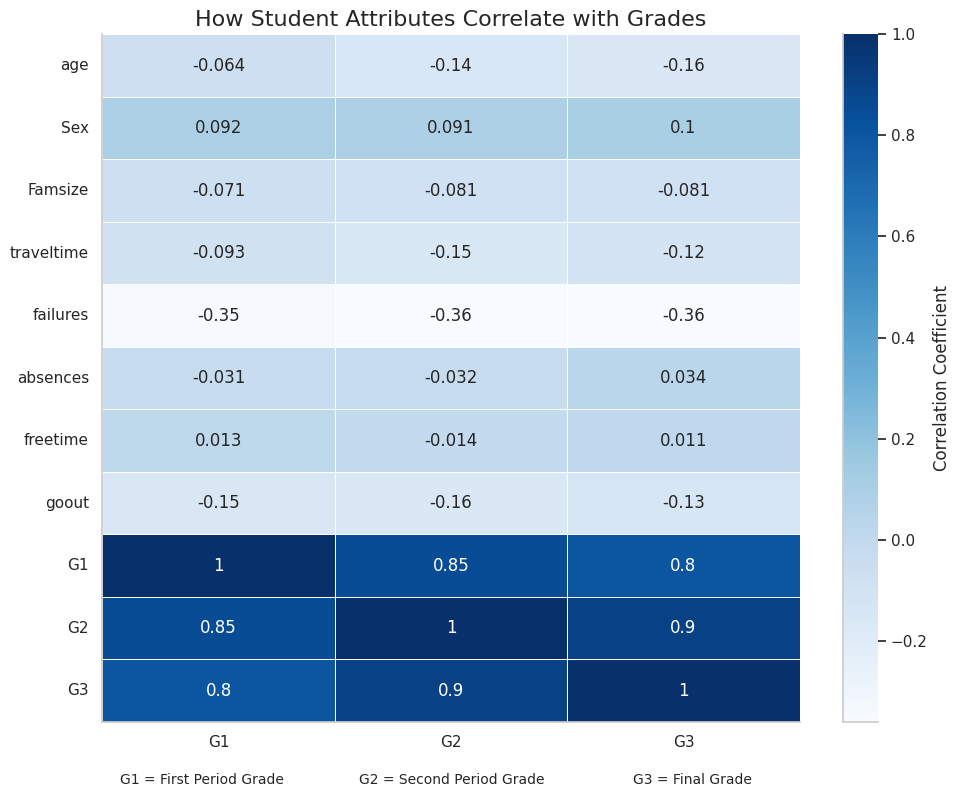

In [ ]:
# Convert categorical variables to numeric
df['Sex'] = df['sex'].map({'F': 0, 'M': 1})
df['Famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})

# Select numeric columns with converted variables
numeric_df = df[["age", "Sex", "Famsize", "traveltime", "failures", "absences",
                 "freetime", "goout", "G1", "G2", "G3"]]

# Compute correlation matrix
corr = numeric_df.corr()

# Keep only G1, G2, G3 on the x-axis
corr_subset = corr[["G1", "G2", "G3"]]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap="Blues", linewidths=0.5,
            cbar_kws={"label": "Correlation Coefficient"})

# Titles and formatting
plt.title("How Student Attributes Correlate with Grades", fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Add G1, G2, G3 explanation at the bottom
plt.figtext(0.21, 0.01, "G1 = First Period Grade", fontsize=10, ha="center")
plt.figtext(0.46, 0.01, "G2 = Second Period Grade", fontsize=10, ha="center")
plt.figtext(0.7, 0.01, "G3 = Final Grade", fontsize=10, ha="center")

# Clean up borders
sns.despine(top=True, right=True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()
